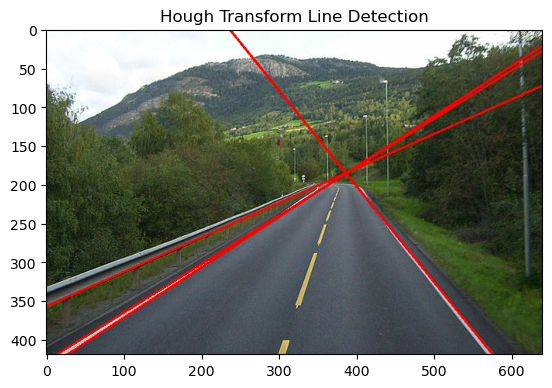

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('road.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(gray, 50, 150, apertureSize=3)
height, width = edges.shape
max_dist = int(np.hypot(height, width))
accumulator = np.zeros((2 * max_dist, 180), dtype=np.int32)
thetas = np.deg2rad(np.arange(0, 180))


y_idxs, x_idxs = np.nonzero(edges)  
for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]
    for t_idx in range(len(thetas)):
        rho = int(x * np.cos(thetas[t_idx]) + y * np.sin(thetas[t_idx]))
        accumulator[rho + max_dist, t_idx] += 1

threshold = 270 

lines = np.argwhere(accumulator > threshold)


for rho, theta in lines:
    rho -= max_dist
    theta = thetas[theta]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform Line Detection')
plt.show()